# 1. 형태소 분석

In [1]:
# 1. 데이터 불러오기
import pandas as pd
data = pd.read_csv(r"C:\Wanted\02_ProjectCollections\25.01_프로젝트#2_'BE MY MUSE' 작사 공모전\(Data)\'music_data.csv'")
data = data.head(50)
data.head(1)

,title,artist,lyrics,release_date,likes
0,"HOME SWEET HOME (feat. 태양, 대성)",G-DRAGON,"You say, It’s changed\nShow must go on, Behave...",2024.11.22,"164,598"


In [2]:
# 2. 필요한 컬럼 데이터 정규화 진행
import re
lyrics = data['lyrics']

## lyrics_re 만들기
lyrics_re = []
for idx in range(len(lyrics)):
    lyrics_re.append(re.sub("[^0-9a-zA-Zㄱ-ㅎ가-힣\\s+!]", "", lyrics[idx]))
lyrics_re

['You say Its changed\nShow must go on Behave\n오랜만에 옛 노래해\nIm feelin like I never left\nThats right I never left\n\nBut you aint know OK then lights camera Act like you know\nDont play on me no were\nAir BB Youre Homeless\n혼비백산해진미장센 miseenscne\n도레미파시도 Now you know it\n\n두껍아 두껍아 Came with the troops\n뜯고 맛보고 즐기고 big bang when I shoot\nKing in the Zoo He gotta do what I do\n1 of 1 not of them mirror\nMan in the Views Aimin at you!\nYea Im aiming at a man  Amen achoo\nBless you all Cleaned house Foo\n\nGolden days are still alive\n외롭다는 말하지 마\n내가 있는 곳 네가 있을 곳\n\nThe place that I belong\n\nHOME SWEET HOME\nHOME SICK HOME\nWell I said I would be back\nAnd Id never let you go\nPick a petal off a flower\nDaze you love me Nope\nWell I said I would be back\nAnd Id never let you go\nPick a petal off a flower\nDo you love me or STOP!\n\nWinner winner chicken killer 삼계탕 dinner\n하나 둘 set down 1 2 step Fantastic한 팀워크\nNot mini 많이 More\nRock scissors paper Toast\nThis is how we do it just do it lets do

In [3]:
# 3. KoNLPy : 형태소 분석
from konlpy.tag import Komoran
komoran = Komoran()
ly_pos = []
lyrics_pos = []

## 3-1. 형태소(단어, 품사) 분석
for ly in lyrics_re :
    ly_pos.append(komoran.pos(ly))
    for i in range(len(ly_pos)) :
        for word, pos in ly_pos[i] :
            lyrics_pos.append([word, pos])
len(lyrics_pos)

## 3-2. 품사 분류하기
pos_list = []

for abs in range(len(lyrics_pos)) :
    if lyrics_pos[abs][1] != 'SL' :
        pos_list.append(lyrics_pos[abs][1])

## 3-3. 단어 분류하기
word_list = []

for abs in range(len(lyrics_pos)) :
    if lyrics_pos[abs][0] != 'SL' :
        word_list.append(lyrics_pos[abs][0])

In [4]:
# 확인하기
print(len(lyrics_pos))
print(len(pos_list))
print(len(word_list))
print(len(set(pos_list)))
print(len(set(word_list)))

612299
430167
612299
36
3209


In [5]:
# 4. 품사 종류 개수 확인하기
from collections import Counter
# word_list_counter  = Counter(word_list)
# print(word_list_counter)
pos_list_counter  = Counter(pos_list)
print(pos_list_counter)


Counter({'EC': 71287, 'NNG': 59774, 'VV': 56913, 'ETM': 27701, 'MAG': 25119, 'NP': 22307, 'NNP': 21760, 'JX': 19467, 'VA': 16296, 'JKB': 12313, 'JKS': 11645, 'VX': 11611, 'EP': 10976, 'JKO': 10727, 'NNB': 9714, 'XSV': 7453, 'MM': 7179, 'VCP': 4079, 'XR': 3952, 'XSA': 3458, 'XSN': 2580, 'ETN': 2298, 'JKG': 2143, 'MAJ': 1861, 'IC': 1589, 'SN': 1399, 'NR': 1186, 'JC': 1184, 'VCN': 786, 'NA': 672, 'SF': 356, 'XPN': 176, 'JKV': 144, 'EF': 38, 'JKC': 21, 'SW': 3})


C:\Users\user\AppData\Local\Temp\ipykernel_17924\649362306.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


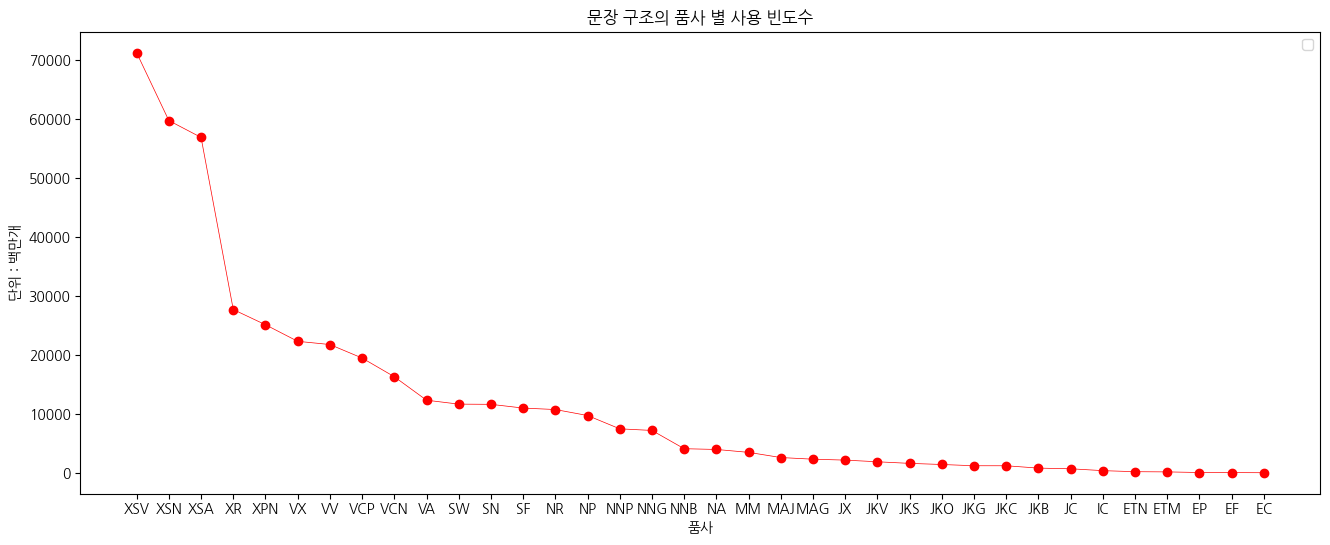

In [6]:
# 5. 문장 구조의 품사 별 사용 빈도수 그래프로 나타내기
import koreanize_matplotlib
import matplotlib.pyplot as plt

x = sorted(pos_list_counter.keys(), reverse=True)
y = sorted(pos_list_counter.values(), reverse=True)

plt.figure(figsize=(16, 6))
plt.plot(x, y, color="red", linewidth=0.5, marker='o')
plt.ylabel('단위 : 백만개')
plt.xlabel('품사')
plt.title('문장 구조의 품사 별 사용 빈도수')
plt.legend()
plt.show()

## - GPU 사용을 위한 설정 확인

In [7]:
# 1. GPU 사용 여부 확인
import torch

## GPU 사용 가능 여부 확인
print(torch.cuda.is_available())        # True라면 GPU 사용 가능
print(torch.cuda.device_count())        # 사용 가능한 GPU 개수 출력
print(torch.cuda.get_device_name(0))    # 첫 번째 GPU 이름 출력

# 2. 디바이스 설정 (GPU가 없으면 CPU 사용)
device = torch.device("cuda")
print(f"Using device: {device}")

True
1
NVIDIA GeForce RTX 4070 Laptop GPU
Using device: cuda


In [8]:
# 6. 품사 별 단어 모음 변수 만들기
## 품사 별 정의부 
subject_pos = {"NNG", "NNP", "NNB", "NP", "NR"}
josa_pos = {"JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC"}
predicate_pos = {"VV", "VA", "VX"}
etc_pos = {"IC"}

## 결과 저장 리스트
subject_words = []
josa_words = []
predicate_words = []
etc_words = []
unknown_words = []

from tqdm import tqdm

for word, pos in tqdm(lyrics_pos):
    match pos:
        case pos if pos in subject_pos:
            subject_words.append(word)
        case pos if pos in josa_pos:
            josa_words.append(word)
        case pos if pos in predicate_pos:
            predicate_words.append(word)
        case pos if pos in etc_pos:
            etc_words.append(word)
        case _:
            unknown_words.append(word)  # 분류되지 않은 경우


100%|██████████| 612299/612299 [00:00<00:00, 3095327.12it/s]


In [9]:
# print(subject_words)
# print(josa_words)
# print(predicate_words)
# print(etc_words)
# print(unknown_words)

In [10]:
print(len(subject_words))
print(len(josa_words))
print(len(predicate_words))
print(len(etc_words))
print(len(unknown_words))

114741
57644
84820
1589
353505


# 2. 감성 분류

In [ ]:
# 1. 모듈 불러오기
import torch
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TextClassificationPipeline

In [10]:
# 모델 설정 : huggingface에 있는 KOTE 모델 사용하기
model_name = "searle-j/kote_for_easygoing_people"
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# 토크나이저 설정 : KOTE에 맞는 토크나이저 Auto로 설정하기
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 감정 분석할 파이프 라인 생성
pipeline = TextClassificationPipeline(
        model=model,
        tokenizer=tokenizer,
        device=0, # GPU 사용은 0, 1 CPU 사용은 -1(default)
        return_all_scores=False,
        function_to_apply='sigmoid',
        top_k=3,
        truncation=True
    )

Device set to use cuda:0
